## Exploration

In [1]:
# Import the libraries required for exploration and preproccesing
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
 
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [2]:
# Give names to the features
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names

# df_train = pd.read_csv(('./CMaps/train_FD001.txt'), sep='\s+', header=None, names=col_names)
# df_test = pd.read_csv(('./CMaps/test_FD001.txt'), sep='\s+', header=None, names=col_names)
# df_test_RUL = pd.read_csv(('./CMaps/RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

df_train = pd.read_csv(('data/train/train_FD001.txt'), sep='\s+', header=None, names=col_names)
df_test = pd.read_csv(('data/test/test_FD001.txt'), sep='\s+', header=None, names=col_names)
df_test_RUL = pd.read_csv(('data/RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

In [3]:
df_train.head(3)

engine  cycle  setting_1  setting_2  setting_3  (Fan inlet temperature) (◦R)  (LPC outlet temperature) (◦R)  (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  (Fan inlet Pressure) (psia)  (bypass-duct pressure) (psia)  (HPC outlet pressure) (psia)  (Physical fan speed) (rpm)  (Physical core speed) (rpm)  (Engine pressure ratio(P50/P2)  (HPC outlet Static pressure) (psia)  (Ratio of fuel flow to Ps30) (pps/psia)  (Corrected fan speed) (rpm)  (Corrected core speed) (rpm)  (Bypass Ratio)   (Burner fuel-air ratio)  (Bleed Enthalpy)  (Required fan speed)  (Required fan conversion speed)  (High-pressure turbines Cool air flow)  (Low-pressure turbines Cool air flow)
0       1      1    -0.0007    -0.0004      100.0                        518.67                         641.82                        1589.70                        1400.60                        14.62                          21.61                        554.36                     2388.06                      9046.19                             1.3                                47.47                                   521.66                      2388.02                       8138.62           8.4195                     0.03               392                  2388                            100.0                                   39.06                                23.4190
1       1      2     0.0019    -0.0003      100.0                        518.67                         642.15                        1591.82                        1403.14                        14.62                          21.61                        553.75                     2388.04                      9044.07                             1.3                                47.49                                   522.28                      2388.07                       8131.49           8.4318                     0.03               392                  2388                            100.0                                   39.00                                23.4236
2       1      3    -0.0043     0.0003      100.0                        518.67                         642.35                        1587.99                        1404.20                        14.62                          21.61                        554.26                     2388.08                      9052.94                             1.3                                47.27                                   522.42                      2388.03                       8133.23           8.4178                     0.03               390                  2388                            100.0                                   38.95                                23.3442

In [4]:
df_test.head()

engine  cycle  setting_1  setting_2  setting_3  (Fan inlet temperature) (◦R)  (LPC outlet temperature) (◦R)  (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  (Fan inlet Pressure) (psia)  (bypass-duct pressure) (psia)  (HPC outlet pressure) (psia)  (Physical fan speed) (rpm)  (Physical core speed) (rpm)  (Engine pressure ratio(P50/P2)  (HPC outlet Static pressure) (psia)  (Ratio of fuel flow to Ps30) (pps/psia)  (Corrected fan speed) (rpm)  (Corrected core speed) (rpm)  (Bypass Ratio)   (Burner fuel-air ratio)  (Bleed Enthalpy)  (Required fan speed)  (Required fan conversion speed)  (High-pressure turbines Cool air flow)  (Low-pressure turbines Cool air flow)
0       1      1     0.0023     0.0003      100.0                        518.67                         643.02                        1585.29                        1398.21                        14.62                          21.61                        553.90                     2388.04                      9050.17                             1.3                                47.20                                   521.72                      2388.03                       8125.55           8.4052                     0.03               392                  2388                            100.0                                   38.86                                23.3735
1       1      2    -0.0027    -0.0003      100.0                        518.67                         641.71                        1588.45                        1395.42                        14.62                          21.61                        554.85                     2388.01                      9054.42                             1.3                                47.50                                   522.16                      2388.06                       8139.62           8.3803                     0.03               393                  2388                            100.0                                   39.02                                23.3916
2       1      3     0.0003     0.0001      100.0                        518.67                         642.46                        1586.94                        1401.34                        14.62                          21.61                        554.11                     2388.05                      9056.96                             1.3                                47.50                                   521.97                      2388.03                       8130.10           8.4441                     0.03               393                  2388                            100.0                                   39.08                                23.4166
3       1      4     0.0042     0.0000      100.0                        518.67                         642.44                        1584.12                        1406.42                        14.62                          21.61                        554.07                     2388.03                      9045.29                             1.3                                47.28                                   521.38                      2388.05                       8132.90           8.3917                     0.03               391                  2388                            100.0                                   39.00                                23.3737
4       1      5     0.0014     0.0000      100.0                        518.67                         642.51                        1587.19                        1401.92                        14.62                          21.61                        554.16                     2388.01                      9044.55                             1.3                                47.31                                   522.15                      2388.03                       8129.54           8.4031                     0.03               390                  2388                  

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   20631 non-null  int64  
 1   cycle                                    20631 non-null  int64  
 2   setting_1                                20631 non-null  float64
 3   setting_2                                20631 non-null  float64
 4   setting_3                                20631 non-null  float64
 5   (Fan inlet temperature) (◦R)             20631 non-null  float64
 6   (LPC outlet temperature) (◦R)            20631 non-null  float64
 7   (HPC outlet temperature) (◦R)            20631 non-null  float64
 8   (LPT outlet temperature) (◦R)            20631 non-null  float64
 9   (Fan inlet Pressure) (psia)              20631 non-null  float64
 10  (bypass-duct pressure) (psia)            20631

In [6]:
df_train.describe(include='all').T

count         mean           std        min        25%        50%        75%        max
engine                                   20631.0    51.506568  2.922763e+01     1.0000    26.0000    52.0000    77.0000   100.0000
cycle                                    20631.0   108.807862  6.888099e+01     1.0000    52.0000   104.0000   156.0000   362.0000
setting_1                                20631.0    -0.000009  2.187313e-03    -0.0087    -0.0015     0.0000     0.0015     0.0087
setting_2                                20631.0     0.000002  2.930621e-04    -0.0006    -0.0002     0.0000     0.0003     0.0006
setting_3                                20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   100.0000   100.0000
(Fan inlet temperature) (◦R)             20631.0   518.670000  0.000000e+00   518.6700   518.6700   518.6700   518.6700   518.6700
(LPC outlet temperature) (◦R)            20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   643.0000   644.5300
(HPC outlet temperature) (◦R)            20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000  1594.3800  1616.9100
(LPT outlet temperature) (◦R)            20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400  1414.5550  1441.4900
(Fan inlet Pressure) (psia)              20631.0    14.620000  1.776400e-15    14.6200    14.6200    14.6200    14.6200    14.6200
(bypass-duct pressure) (psia)            20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100    21.6100    21.6100
(HPC outlet pressure) (psia)             20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   554.0100   556.0600
(Physical fan speed) (rpm)               20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900  2388.1400  2388.5600
(Physical core speed) (rpm)              20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600  9069.4200  9244.5900
(Engine pressure ratio(P50/P2)           20631.0     1.300000  0.000000e+00     1.3000     1.3000     1.3000     1.3000     1.3000
(HPC outlet Static pressure) (psia)      20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100    47.7000    48.5300
(Ratio of fuel flow to Ps30) (pps/psia)  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   521.9500   523.3800
(Corrected fan speed) (rpm)              20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900  2388.1400  2388.5600
(Corrected core speed) (rpm)             20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400  8148.3100  8293.7200
(Bypass Ratio)                           20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389     8.4656     8.5848
(Burner fuel-air ratio)                  20631.0     0.030000  1.387812e-17     0.0300     0.0300     0.0300     0.0300     0.0300
(Bleed Enthalpy)                         20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   394.0000   400.0000
(Required fan speed)                     20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000  2388.0000  2388.0000
(Required fan conversion speed)          20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   100.0000   100.0000
(High-pressure turbines Cool air flow)   20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300    38.9500    39.4300
(Low-pressure turbines Cool air flow)    20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979    23.3668    23.6184

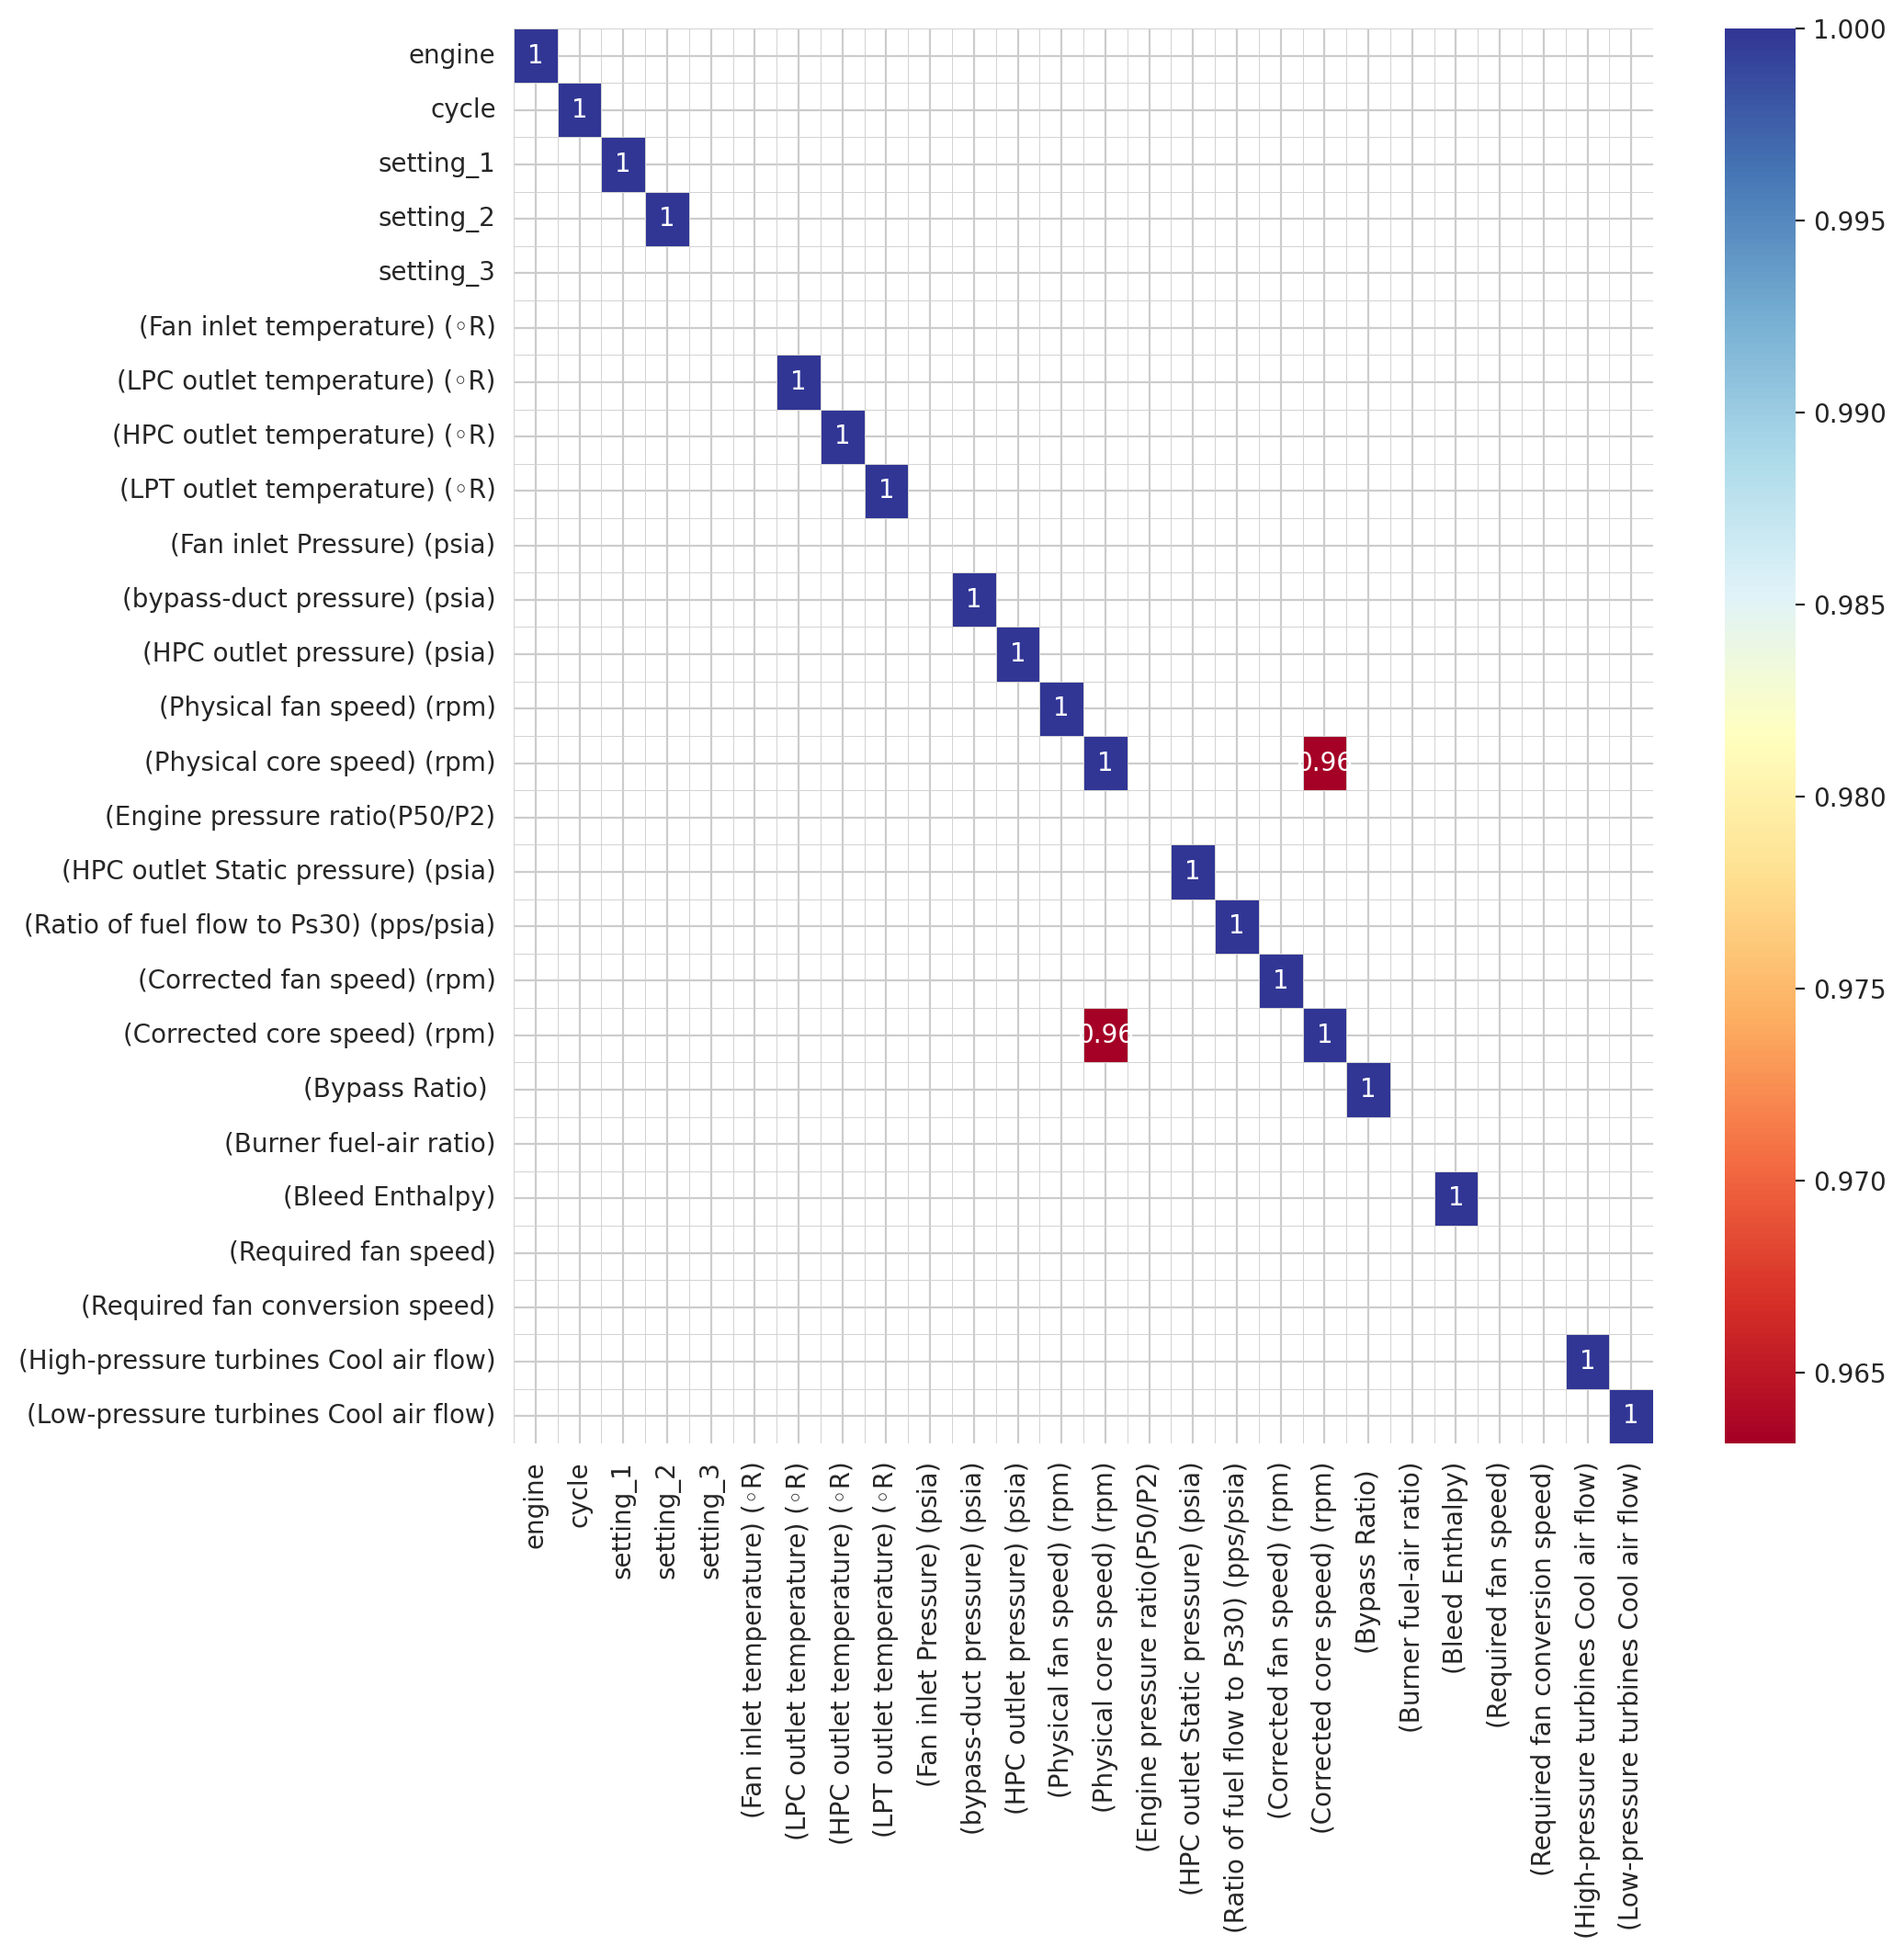

In [7]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

## The profiling report follows to look for outliers, missing values, and distributions. We can see that the data is imbalanced.

In [9]:
from pandas_profiling import ProfileReport

In [ ]:


%%time
profile = ProfileReport(df_train,
                        title="Predictive Maintenance",
                        dataset={"description": "This profiling report was generated for the Predictive Maintenance dataset, which contains data on aircraft engines. The dataset includes various sensor readings and settings for each engine cycle, allowing for the analysis of engine performance and the prediction of remaining useful life (RUL).",
                                 "copyright_holder": "Carl Kirstein",
                                 "copyright_year": "2022",
                                },
                        explorative=True,
                       )
profile

#if you want to save the report of data then use the following line. very useful for sharing the report. 
profile.to_file("predictive_maintenance_profile.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 13.16it/s]

CPU times: user 2min 14s, sys: 3.29 s, total: 2min 17s
Wall time: 2min 19s


In [12]:
# drop the sensors wiith constant values
sens_const_values = []
for feature in list(setting_names + sensor_names):
    try:
        if df_train[feature].min()==df_train[feature].max():
            sens_const_values.append(feature)
    except:
        pass

print(sens_const_values)
df_train.drop(sens_const_values,axis=1,inplace=True)
df_test.drop(sens_const_values,axis=1,inplace=True)

['setting_3', '(Fan inlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(Engine pressure ratio(P50/P2)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)']


In [13]:
# drop all but one of the highly correlated features
cor_matrix = df_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(corr_features)
df_train.drop(corr_features,axis=1,inplace=True)
df_test.drop(corr_features,axis=1,inplace=True)

['(Corrected core speed) (rpm)']


In [ ]:
#list remaining features
#"Remaining features after dropping constant and highly correlated features:")
list(df_train)

['engine',
 'cycle',
 'setting_1',
 'setting_2',
 '(LPC outlet temperature) (◦R)',
 '(HPC outlet temperature) (◦R)',
 '(LPT outlet temperature) (◦R)',
 '(bypass-duct pressure) (psia)',
 '(HPC outlet pressure) (psia)',
 '(Physical fan speed) (rpm)',
 '(Physical core speed) (rpm)',
 '(HPC outlet Static pressure) (psia)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(Corrected fan speed) (rpm)',
 '(Bypass Ratio) ',
 '(Bleed Enthalpy)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)']

In [15]:


df_train.head()



engine  cycle  setting_1  setting_2  (LPC outlet temperature) (◦R)  (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  (bypass-duct pressure) (psia)  (HPC outlet pressure) (psia)  (Physical fan speed) (rpm)  (Physical core speed) (rpm)  (HPC outlet Static pressure) (psia)  (Ratio of fuel flow to Ps30) (pps/psia)  (Corrected fan speed) (rpm)  (Bypass Ratio)   (Bleed Enthalpy)  (High-pressure turbines Cool air flow)  (Low-pressure turbines Cool air flow)
0       1      1    -0.0007    -0.0004                         641.82                        1589.70                        1400.60                          21.61                        554.36                     2388.06                      9046.19                                47.47                                   521.66                      2388.02           8.4195               392                                   39.06                                23.4190
1       1      2     0.0019    -0.0003                         642.15                        1591.82                        1403.14                          21.61                        553.75                     2388.04                      9044.07                                47.49                                   522.28                      2388.07           8.4318               392                                   39.00                                23.4236
2       1      3    -0.0043     0.0003                         642.35                        1587.99                        1404.20                          21.61                        554.26                     2388.08                      9052.94                                47.27                                   522.42                      2388.03           8.4178               390                                   38.95                                23.3442
3       1      4     0.0007     0.0000                         642.35                        1582.79                        1401.87                          21.61                        554.45                     2388.11                      9049.48                                47.13                                   522.86                      2388.08           8.3682               392                                   38.88                                23.3739
4       1      5    -0.0019    -0.0002                         642.37                        1582.85                        1406.22                          21.61                        554.00                     2388.06                      9055.15                                47.28                                   522.19                      2388.04           8.4294               393                                   38.90                                23.4044

In [16]:
features = list(df_train.columns)

In [17]:
# check for missing data
for feature in features:
    print(feature + " - " + str(len(df_train[df_train[feature].isna()])))

engine - 0
cycle - 0
setting_1 - 0
setting_2 - 0
(LPC outlet temperature) (◦R) - 0
(HPC outlet temperature) (◦R) - 0
(LPT outlet temperature) (◦R) - 0
(bypass-duct pressure) (psia) - 0
(HPC outlet pressure) (psia) - 0
(Physical fan speed) (rpm) - 0
(Physical core speed) (rpm) - 0
(HPC outlet Static pressure) (psia) - 0
(Ratio of fuel flow to Ps30) (pps/psia) - 0
(Corrected fan speed) (rpm) - 0
(Bypass Ratio)  - 0
(Bleed Enthalpy) - 0
(High-pressure turbines Cool air flow) - 0
(Low-pressure turbines Cool air flow) - 0


In [18]:
#add rul as a remaining useful life (RUL) column to the training set (target feature in data)
# define the maximum life of each engine, as this could be used to obtain the RUL at each point in time of the engine's life 
df_train_RUL = df_train.groupby(['engine']).agg({'cycle':'max'})
df_train_RUL.rename(columns={'cycle':'life'},inplace=True)
df_train_RUL.head()

life
engine      
1        192
2        287
3        179
4        189
5        269

In [19]:
df_train=df_train.merge(df_train_RUL,how='left',on=['engine'])

In [20]:
df_train['RUL']=df_train['life']-df_train['cycle']
df_train.drop(['life'],axis=1,inplace=True)

# the RUL prediction is only useful nearer to the end of the engine's life, therefore we put an upper limit on the RUL
# this is a bit sneaky, since it supposes that the test set has RULs of less than this value, the closer you are
# to the true value, the more accurate the model will be
df_train['RUL'][df_train['RUL']>125]=125
df_train.head()

engine  cycle  setting_1  setting_2  (LPC outlet temperature) (◦R)  (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  (bypass-duct pressure) (psia)  (HPC outlet pressure) (psia)  (Physical fan speed) (rpm)  (Physical core speed) (rpm)  (HPC outlet Static pressure) (psia)  (Ratio of fuel flow to Ps30) (pps/psia)  (Corrected fan speed) (rpm)  (Bypass Ratio)   (Bleed Enthalpy)  (High-pressure turbines Cool air flow)  (Low-pressure turbines Cool air flow)  RUL
0       1      1    -0.0007    -0.0004                         641.82                        1589.70                        1400.60                          21.61                        554.36                     2388.06                      9046.19                                47.47                                   521.66                      2388.02           8.4195               392                                   39.06                                23.4190  125
1       1      2     0.0019    -0.0003                         642.15                        1591.82                        1403.14                          21.61                        553.75                     2388.04                      9044.07                                47.49                                   522.28                      2388.07           8.4318               392                                   39.00                                23.4236  125
2       1      3    -0.0043     0.0003                         642.35                        1587.99                        1404.20                          21.61                        554.26                     2388.08                      9052.94                                47.27                                   522.42                      2388.03           8.4178               390                                   38.95                                23.3442  125
3       1      4     0.0007     0.0000                         642.35                        1582.79                        1401.87                          21.61                        554.45                     2388.11                      9049.48                                47.13                                   522.86                      2388.08           8.3682               392                                   38.88                                23.3739  125
4       1      5    -0.0019    -0.0002                         642.37                        1582.85                        1406.22                          21.61                        554.00                     2388.06                      9055.15                                47.28                                   522.19                      2388.04           8.4294               393                                   38.90                                23.4044  125

## Plot sensor outputs for all sensors aquired during feature engineering

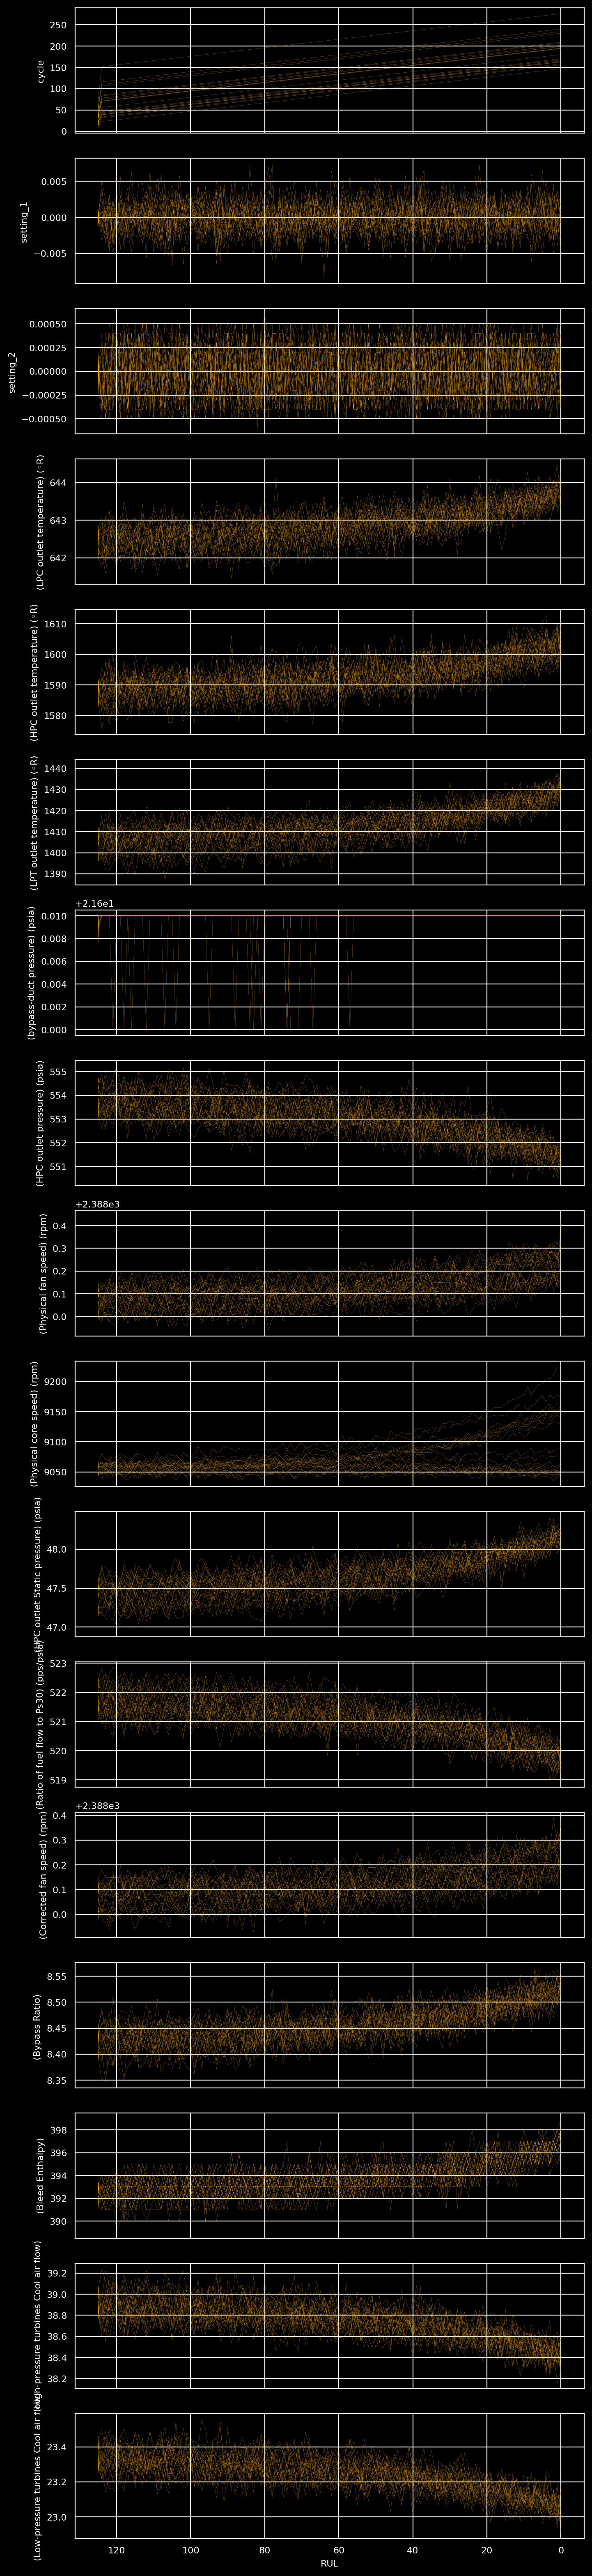

In [26]:
plt.style.use('dark_background')

plt.rcParams['figure.figsize'] = (8, 40)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 0.1
plot_items = list(df_train.columns)[1:-1]
fig, ax = plt.subplots(len(plot_items), sharex=True)
ax[0].invert_xaxis()

engines = list(df_train['engine'].unique())

for engine in engines[10:30]:
    for i, item in enumerate(plot_items):
        f = sns.lineplot(
            data=df_train[df_train['engine'] == engine],
            x='RUL',
            y=item,
            color='orange',
            ax=ax[i],
        )

In [27]:
# awesome bit of code from https://www.kaggle.com/code/adibouayjan/house-price-step-by-step-modeling

Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
X = df_train.iloc[:,1:-1]
y = df_train.iloc[:,-1]
backward_regression(X, y)

worst_feature : setting_1, 0.359085459881307 
worst_feature : setting_2, 0.1880632357382504 

Selected Features:
['cycle', '(LPC outlet temperature) (◦R)', '(HPC outlet temperature) (◦R)', '(LPT outlet temperature) (◦R)', '(bypass-duct pressure) (psia)', '(HPC outlet pressure) (psia)', '(Physical fan speed) (rpm)', '(Physical core speed) (rpm)', '(HPC outlet Static pressure) (psia)', '(Ratio of fuel flow to Ps30) (pps/psia)', '(Corrected fan speed) (rpm)', '(Bypass Ratio) ', '(Bleed Enthalpy)', '(High-pressure turbines Cool air flow)', '(Low-pressure turbines Cool air flow)']


In [28]:
Selected_Features

[['cycle',
  '(LPC outlet temperature) (◦R)',
  '(HPC outlet temperature) (◦R)',
  '(LPT outlet temperature) (◦R)',
  '(bypass-duct pressure) (psia)',
  '(HPC outlet pressure) (psia)',
  '(Physical fan speed) (rpm)',
  '(Physical core speed) (rpm)',
  '(HPC outlet Static pressure) (psia)',
  '(Ratio of fuel flow to Ps30) (pps/psia)',
  '(Corrected fan speed) (rpm)',
  '(Bypass Ratio) ',
  '(Bleed Enthalpy)',
  '(High-pressure turbines Cool air flow)',
  '(Low-pressure turbines Cool air flow)']]

In [29]:
feature_names = Selected_Features[0]
np.shape(X)

(20631, 17)

In [30]:
len(feature_names)

15

## Modelling and Evaluation

In [31]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [32]:
df_test_cycle = df_test.groupby(['engine']).agg({'cycle':'max'})
df_test_cycle.rename(columns={'cycle':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['engine'])
df_test_max = df_test_max[(df_test_max['cycle']==df_test_max['life'])]
df_test_max.drop(['life'],axis=1,inplace=True)

In [33]:
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [34]:
X_train.head()

cycle  (LPC outlet temperature) (◦R)  (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  (bypass-duct pressure) (psia)  (HPC outlet pressure) (psia)  (Physical fan speed) (rpm)  (Physical core speed) (rpm)  (HPC outlet Static pressure) (psia)  (Ratio of fuel flow to Ps30) (pps/psia)  (Corrected fan speed) (rpm)  (Bypass Ratio)   (Bleed Enthalpy)  (High-pressure turbines Cool air flow)  (Low-pressure turbines Cool air flow)
0      1                         641.82                        1589.70                        1400.60                          21.61                        554.36                     2388.06                      9046.19                                47.47                                   521.66                      2388.02           8.4195               392                                   39.06                                23.4190
1      2                         642.15                        1591.82                        1403.14                          21.61                        553.75                     2388.04                      9044.07                                47.49                                   522.28                      2388.07           8.4318               392                                   39.00                                23.4236
2      3                         642.35                        1587.99                        1404.20                          21.61                        554.26                     2388.08                      9052.94                                47.27                                   522.42                      2388.03           8.4178               390                                   38.95                                23.3442
3      4                         642.35                        1582.79                        1401.87                          21.61                        554.45                     2388.11                      9049.48                                47.13                                   522.86                      2388.08           8.3682               392                                   38.88                                23.3739
4      5                         642.37                        1582.85                        1406.22                          21.61                        554.00                     2388.06                      9055.15                                47.28                                   522.19                      2388.04           8.4294               393                                   38.90                                23.4044

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## KNN

In [42]:
%%time
from sklearn.neighbors import KNeighborsRegressor
start = time.time()
model = KNeighborsRegressor(n_neighbors=9).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()


#  mean_squared_error(y_test,y_predictions,squared=False)
model_performance.loc['kNN'] = [model.score(X_test,y_test), 
                                   mean_squared_error(y_test,y_predictions),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
#  mean_squared_error(y_test,y_predictions,squared=False)
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions)))

R-squared error: 79.79%
Root Mean Squared Error: 349.05
CPU times: user 472 ms, sys: 27.9 ms, total: 500 ms
Wall time: 554 ms


In [43]:
y_predictions

array([116.44444444, 116.11111111,  74.88888889,  89.66666667,
        89.33333333, 102.11111111,  97.22222222,  80.11111111,
       112.22222222,  97.44444444,  99.        ,  95.        ,
        95.22222222, 116.33333333, 117.66666667, 100.66666667,
        58.33333333,  57.55555556,  78.66666667,  19.11111111,
        75.55555556, 121.77777778, 103.66666667,  25.77777778,
       119.66666667, 109.11111111,  76.88888889,  72.        ,
       100.22222222,  76.44444444,  17.33333333,  64.88888889,
       100.22222222,   5.44444444,  10.22222222,  24.11111111,
        63.33333333,  64.        , 122.11111111,  27.88888889,
        63.        ,  17.66666667,  62.77777778, 111.77777778,
        67.88888889,  55.88888889, 116.11111111, 104.44444444,
        18.55555556, 113.        ,  86.        ,  29.44444444,
        30.33333333, 120.55555556, 109.33333333,  15.        ,
        84.88888889,  51.22222222, 108.88888889,  55.        ,
        41.77777778,  59.11111111,  62.55555556,  48.66

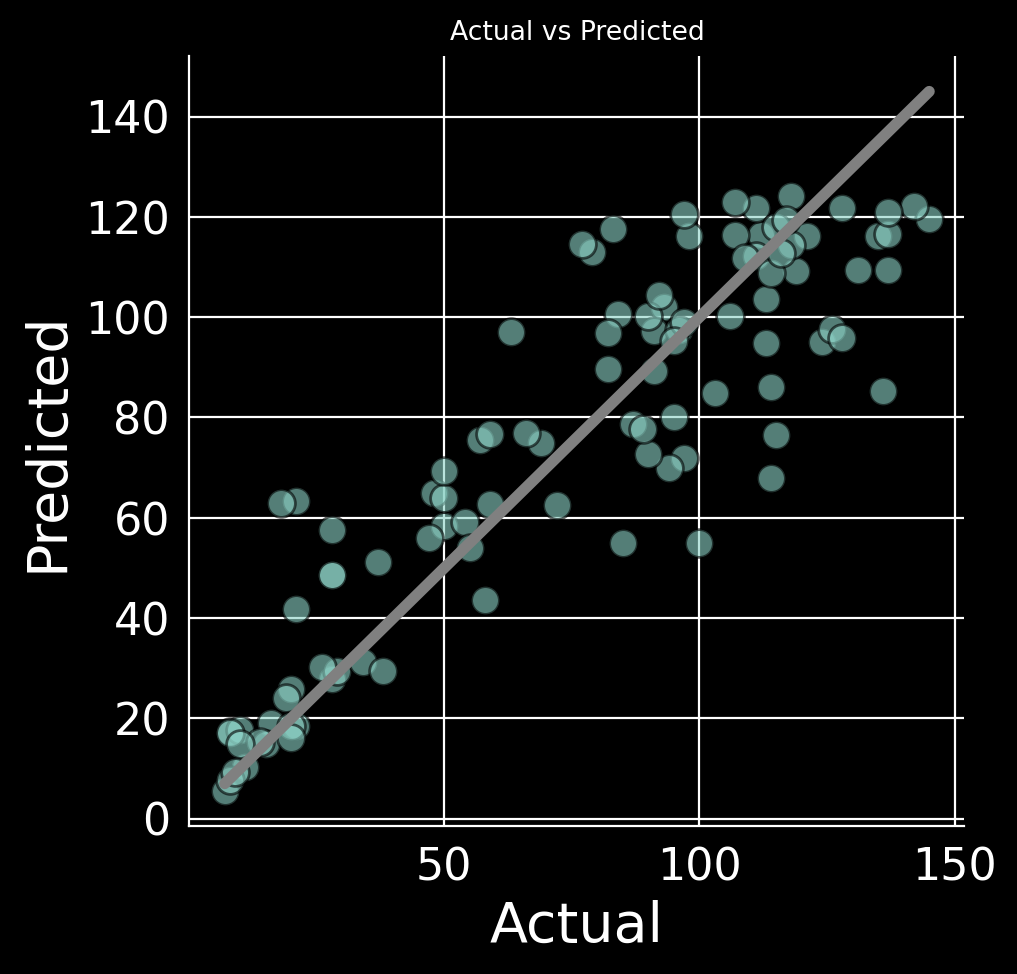

In [45]:
# plt.style.use('seaborn-white')
plt.style.use('dark_background')

plt.rcParams['figure.figsize']=5,5 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y= y_predictions,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions))),
             xy=(0,150),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

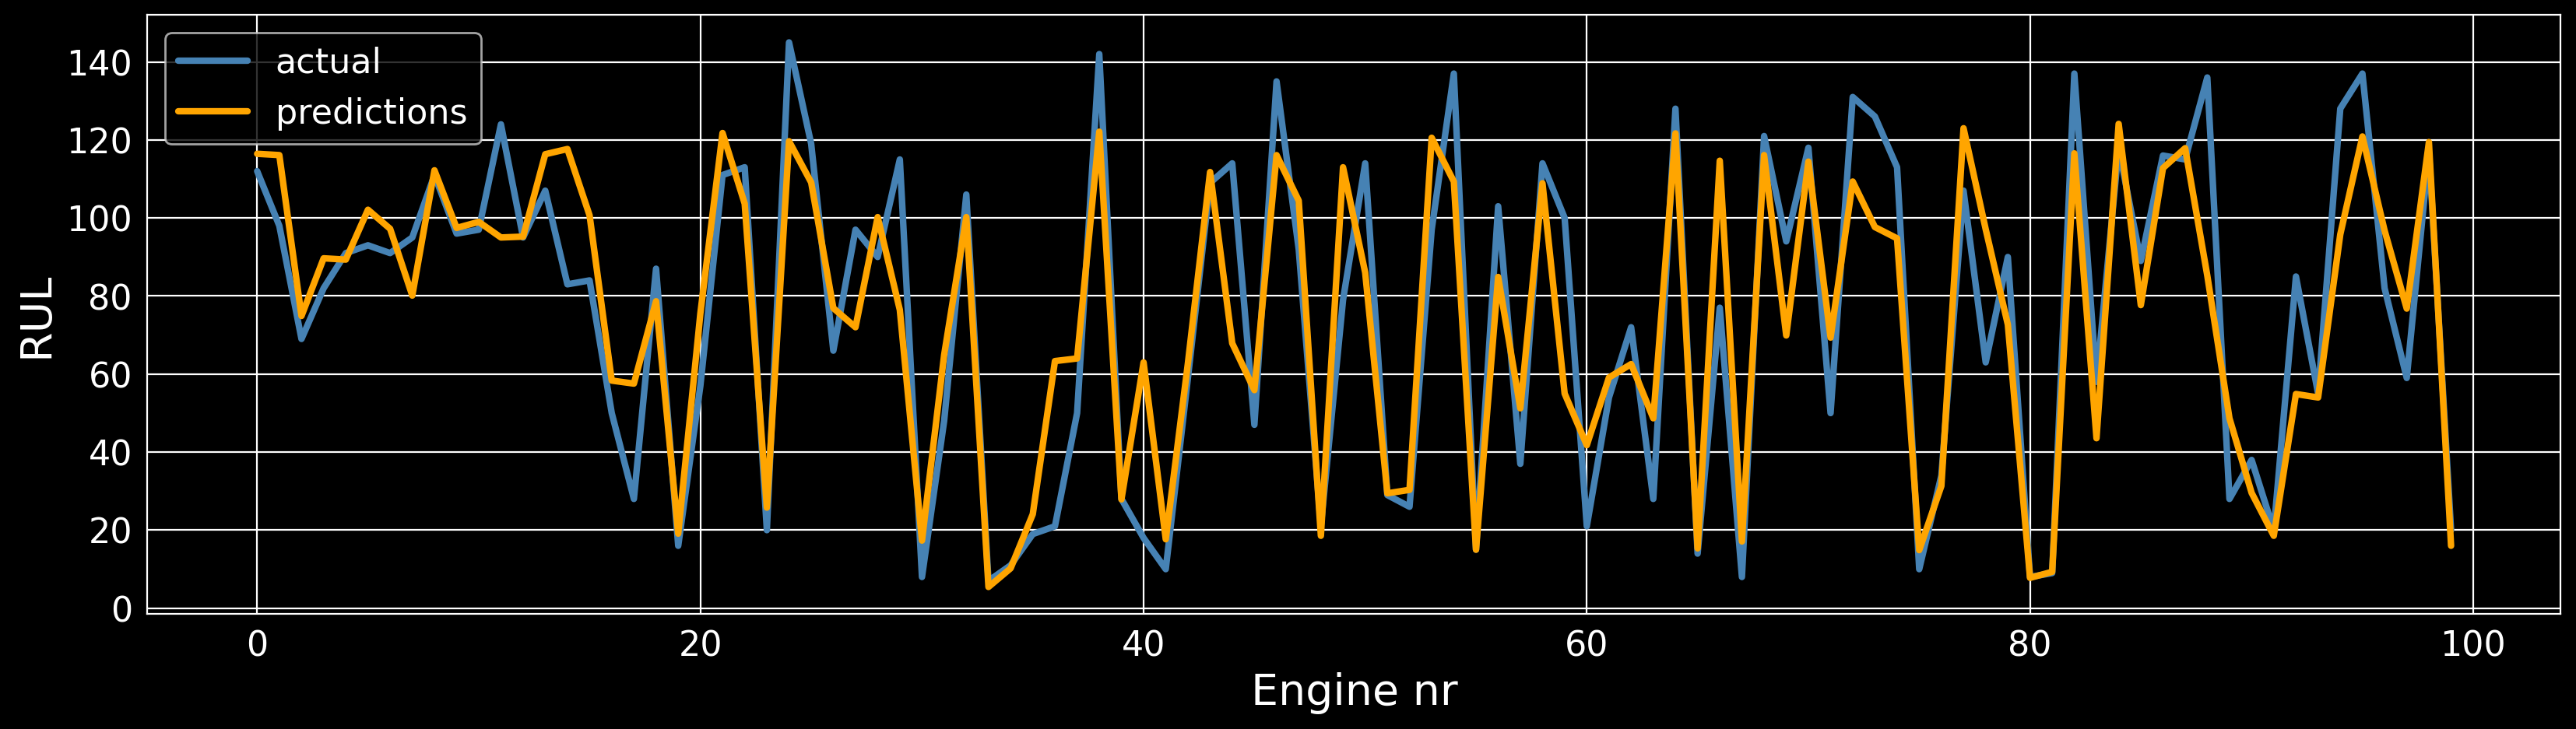

In [47]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize']=20,5 

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_test,
                color='steelblue',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_predictions,
                color='orange',
                label = 'predictions',
                ax=ax)
ax.legend()

## SVM - Support Vector Machines approach

In [48]:
%%time
from sklearn.svm import SVR
start = time.time()
model = SVR(kernel="rbf", C=100, gamma=0.5, epsilon=0.01).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

model_performance.loc['SVM'] = [model.score(X_test,y_test), 
                                   mean_squared_error(y_test,y_predictions),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions)))

R-squared error: 78.13%
Root Mean Squared Error: 377.61
CPU times: user 1min 2s, sys: 281 ms, total: 1min 3s
Wall time: 1min 8s


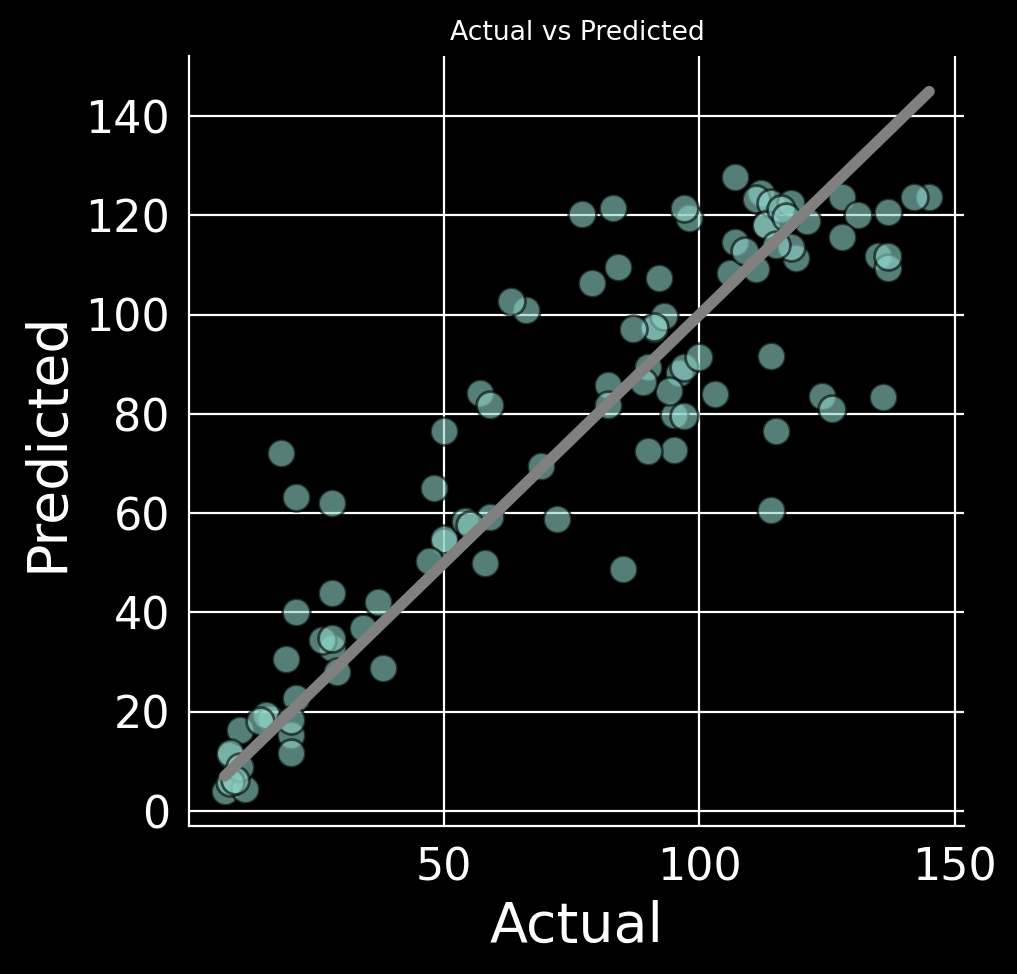

In [51]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize']=5,5 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions))),
             xy=(0,150),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

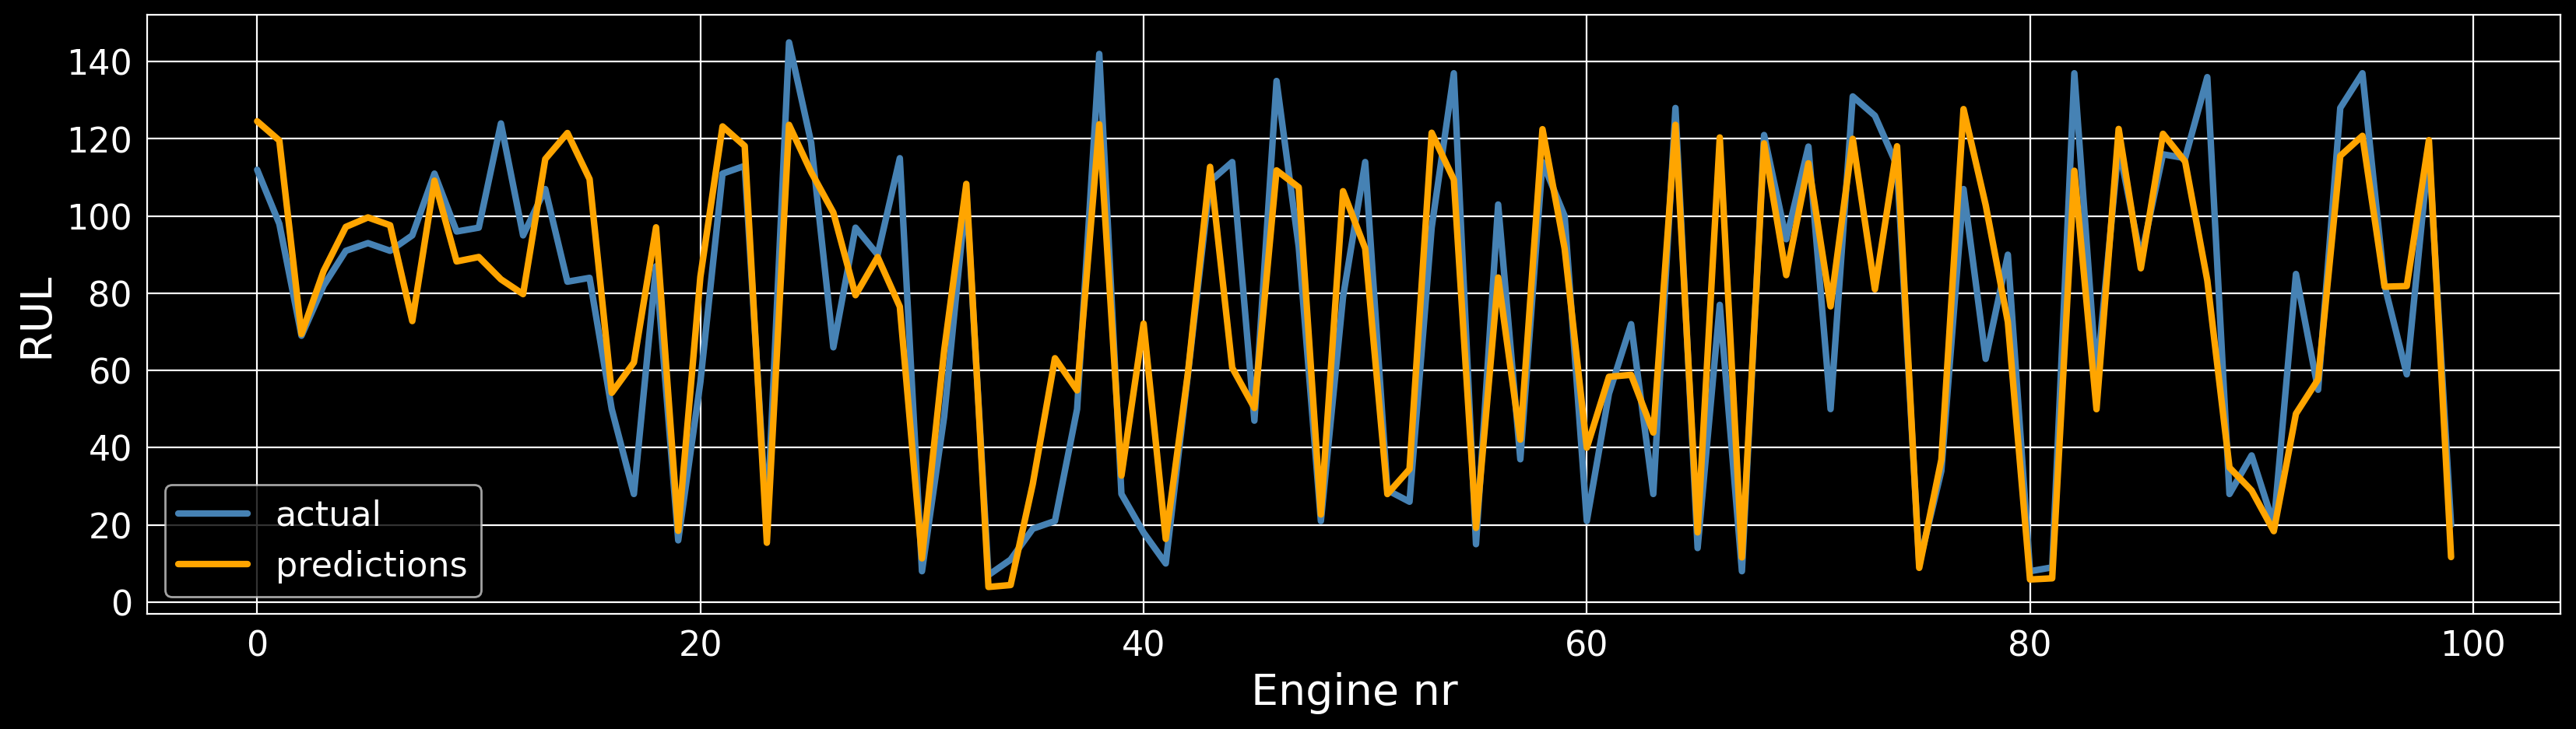

In [53]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize']=20,5 

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_test,
                color='steelblue',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_predictions,
                color='orange',
                label = 'predictions',
                ax=ax)
ax.legend()

## Random Forest

In [54]:
%%time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators=500,
                              min_samples_leaf=1,
                              max_features='sqrt',
                             ).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

model_performance.loc['Random Forest'] = [model.score(X_test,y_test), 
                                   mean_squared_error(y_test,y_predictions),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions)))

R-squared error: 81.19%
Root Mean Squared Error: 324.79
CPU times: user 1min 5s, sys: 1.07 s, total: 1min 6s
Wall time: 31.1 s


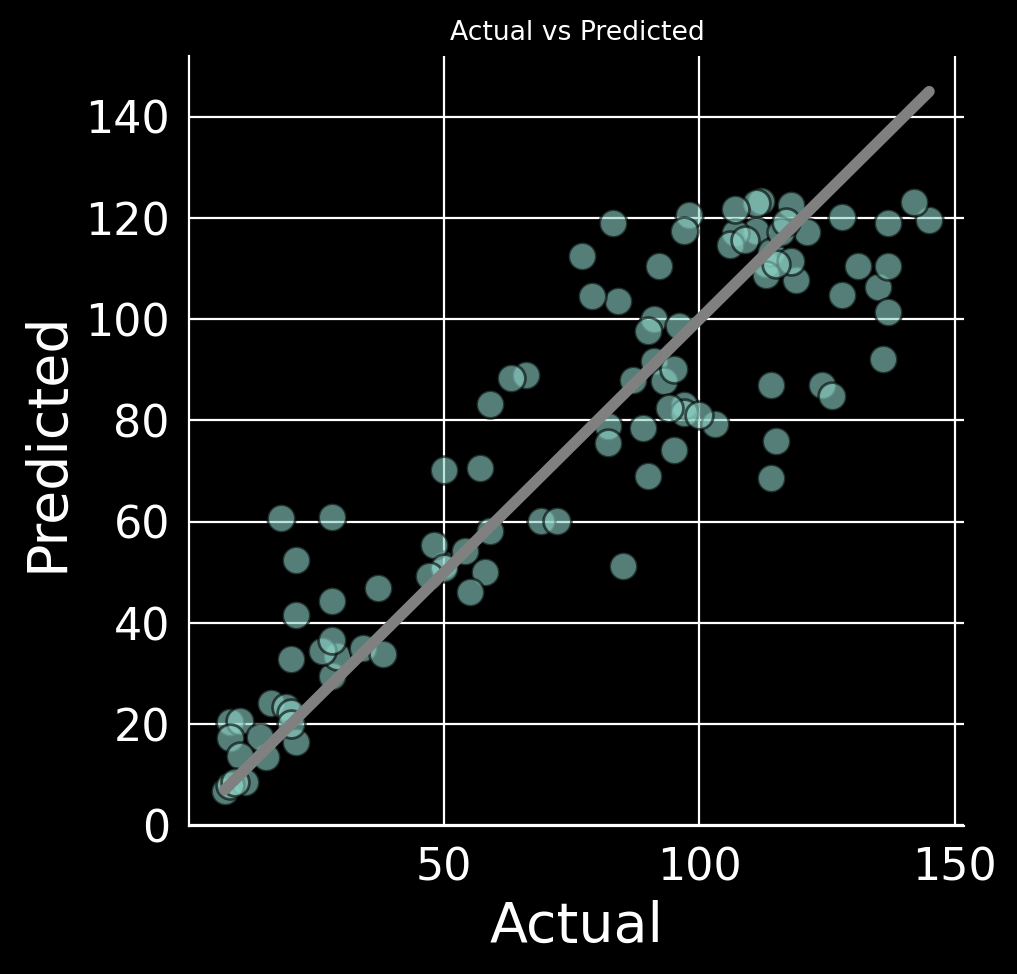

In [56]:
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.figsize']=5,5 

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions))),
             xy=(0,150),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

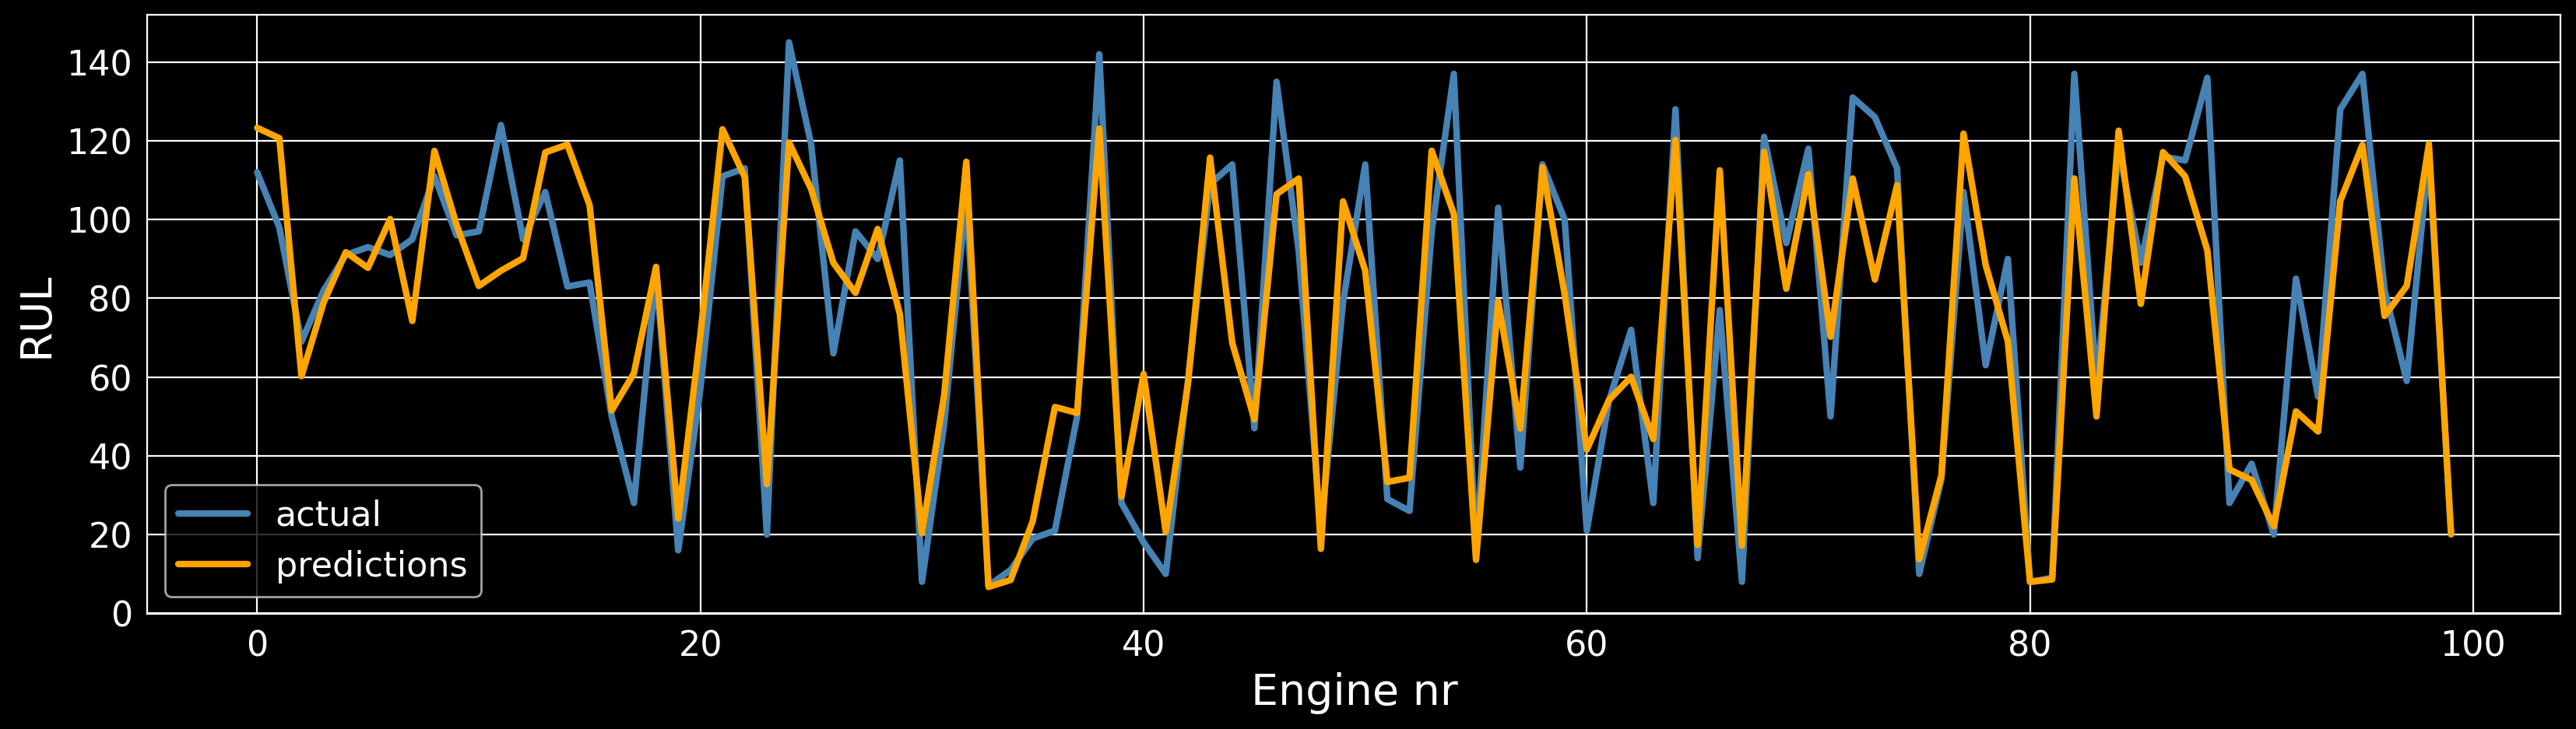

In [58]:
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.figsize']=20,5 

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_test,
                color='steelblue',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_predictions,
                color='orange',
                label = 'predictions',
                ax=ax)
ax.legend()

## LSTM  --> Long Short Term Memory approach 

In [60]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import BatchNormalization, Dropout
# from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
import sklearn

In [61]:
model = keras.Sequential()
model.add(LSTM(100,  
                return_sequences=True,
               input_shape=(1,X_train.shape[1])
              ))
model.add(BatchNormalization())
model.add(LSTM(50,
                return_sequences=True,
               activation='tanh'
              ))
model.add(Dropout(0.5))
model.add(LSTM(10,
               return_sequences=True,
               activation='tanh',
              ))
model.add(Dropout(0.5))
model.add(Dense(100,
               activation='relu',
              ))
model.add(Dense(1))

2025-06-03 13:54:53.522188: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [62]:
model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 100)         │        46,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 100)         │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 50)          │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 10)          │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 10)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 100)         │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1, 1)           │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,641 (315.00 KB)

 Trainable params: 80,441 (314.22 KB)

 Non-trainable params: 200 (800.00 B)

In [64]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=4, min_lr=1e-7, verbose=1)

In [65]:
from sklearn.model_selection import train_test_split

X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train, test_size=0.1)

#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_reshaped = X_train_s.reshape(X_train_s.shape[0], 1, X_train_s.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [66]:
%%time

start = time.time()
history = model.fit(x=X_train_reshaped,y=y_train_s,
                    validation_data = (X_val_reshaped,y_val),
                    epochs = 30,
                    # shuffle = True,
                    batch_size = 500,
                    callbacks=[reduce_lr]
                   )
end_train = time.time()
y_predictions = model.predict(X_test_reshaped) # These are the predictions from the test data.
end_predict = time.time()
y_predictions = y_predictions[:,0][:,0]
model_performance.loc['LSTM'] = [sklearn.metrics.r2_score(y_test, y_predictions), 
                                   mean_squared_error(y_test,y_predictions),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(sklearn.metrics.r2_score(y_test, y_predictions)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions)))

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 156ms/step - loss: 9234.9922 - val_loss: 9198.3730 - learning_rate: 0.0010
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 8880.6689 - val_loss: 8034.4097 - learning_rate: 0.0010
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 7663.5073 - val_loss: 6148.1133 - learning_rate: 0.0010
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 5842.8032 - val_loss: 4332.7856 - learning_rate: 0.0010
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 4001.1279 - val_loss: 2895.2021 - learning_rate: 0.0010
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 2607.6985 - val_loss: 1963.6346 - learning_rate: 0.0010
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 1765.4509 - val_loss: 1123.5295 - learning_rate: 0.0010
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 1310.3353 - val_loss: 882.2227 - learning_rate: 0.0010
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 1154.5734 - val_l

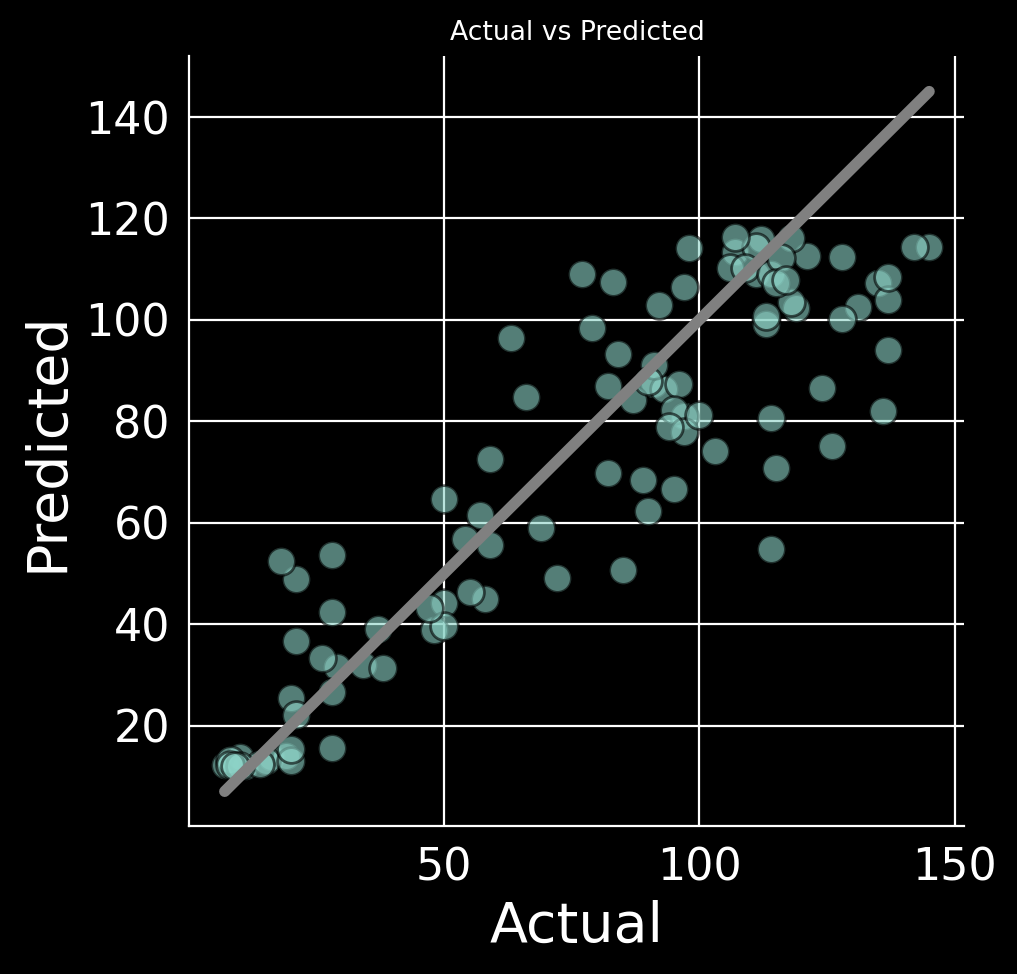

In [67]:
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.figsize']=5,5 

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(sklearn.metrics.r2_score(y_test, y_predictions)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions))),
             xy=(0,150),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

In [ ]:
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.figsize']=20,5 

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_test,
                color='steelblue',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
                y=y_predictions,
                color='orange',
                label = 'predictions',
                ax=ax)
ax.legend()